In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import continuous_probabilistic_methods as cpm

import warnings
warnings.filterwarnings("ignore")

# 1. Using `lemonade.csv` dataset and focusing on continuous variables:
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?

In [2]:
lemonade = pd.read_csv("lemonade.csv")
lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [3]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
lemonade.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

In [5]:
temp_lower_bound, temp_upper_bound = cpm.get_lower_and_upper_bounds(lemonade.Temperature)
print(f"The lower bound for temperature is {temp_lower_bound:.2f}")
print(f"The upper bound for temperature is {temp_upper_bound:.2f}")

The lower bound for temperature is 16.70
The upper bound for temperature is 104.70


In [6]:
continuous_variables = lemonade.select_dtypes(include=["float"])
continuous_variables

,Temperature,Rainfall,Price
0,27.0,2.00,0.5
1,28.9,1.33,0.5
2,34.5,1.33,0.5
3,44.1,1.05,0.5
4,42.4,1.00,0.5
...,...,...,...
360,42.7,1.00,0.5
361,37.8,1.25,0.5
362,39.5,1.25,0.5
363,30.9,1.43,0.5


In [7]:
# write a loop cause I'm lazy
for col in continuous_variables:
    lower_bound, upper_bound = cpm.get_lower_and_upper_bounds(lemonade[col])
    print(f"The lower bound for {col} is {lower_bound:.2f}")
    print(f"The upper bound for {col} is {upper_bound:.2f}")
    print()

The lower bound for Temperature is 16.70
The upper bound for Temperature is 104.70

The lower bound for Rainfall is 0.26
The upper bound for Rainfall is 1.30

The lower bound for Price is 0.50
The upper bound for Price is 0.50



> These outliers make sense. I'm curious about the units of measurement for rainfall. Probably inches.

In [8]:
for col in continuous_variables:
    lower_bound, upper_bound = cpm.get_lower_and_upper_bounds(lemonade[col], k=3)
    print(f"The lower bound for {col} is {lower_bound:.2f}")
    print(f"The upper bound for {col} is {upper_bound:.2f}")
    print()

The lower bound for Temperature is -16.30
The upper bound for Temperature is 137.70

The lower bound for Rainfall is -0.13
The upper bound for Rainfall is 1.69

The lower bound for Price is 0.50
The upper bound for Price is 0.50



> The upper bound for temp is curious as well as the lower bound for rainfall. Rainfall's gotta be erroneous data.

---
# 2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

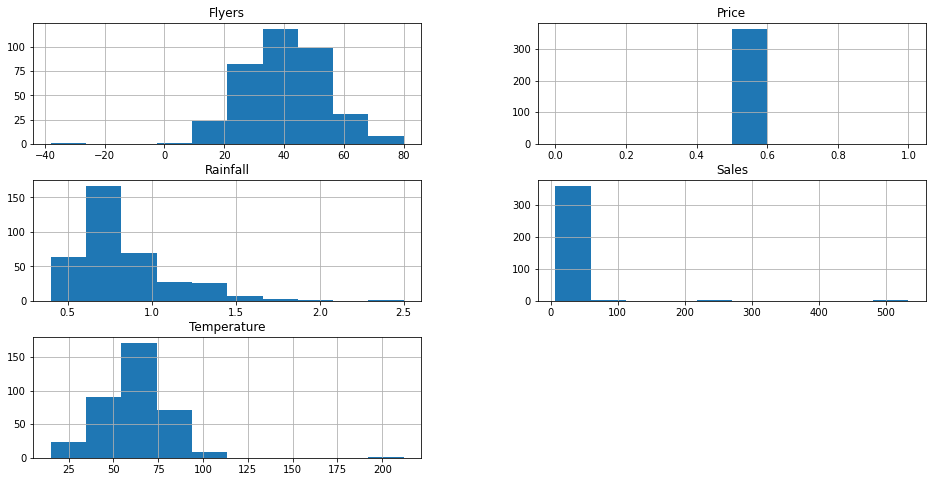

In [9]:
lemonade.hist(figsize=(16, 8))
plt.show()

In [10]:
normal_dist = lemonade[["Flyers", "Rainfall", "Temperature"]]
normal_dist

,Flyers,Rainfall,Temperature
0,15,2.00,27.0
1,15,1.33,28.9
2,27,1.33,34.5
3,28,1.05,44.1
4,33,1.00,42.4
...,...,...,...
360,33,1.00,42.7
361,32,1.25,37.8
362,17,1.25,39.5
363,22,1.43,30.9


In [11]:
for col in normal_dist:
    lemonade[col + "_z-score"] = (lemonade[col] - lemonade[col].mean()) / lemonade[col].std()

In [12]:
lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.820927,4.286488,-1.892340
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.820927,1.840253,-1.787286
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-0.950507,1.840253,-1.477652
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.877972,0.817946,-0.946852
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-0.515297,0.635391,-1.040848
...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,-0.515297,0.635391,-1.024260
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,-0.587832,1.548165,-1.295189
362,12/29/17,Friday,39.5,1.25,17,0.5,15,-1.675857,1.548165,-1.201194
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.313182,2.205363,-1.676702


In [13]:
flyers_outliers = lemonade[lemonade["Flyers_z-score"].abs() >= 2]
flyers_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.676244,-1.299691,2.105251
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,2.168499,-1.044114,1.320109
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,2.603709,-1.299691,1.828792
182,7/2/17,Sunday,93.4,0.51,68,0.5,38,2.023429,-1.153647,1.779030
183,7/3/17,Monday,81.5,0.54,68,0.5,235,2.023429,-1.044114,1.121058
194,7/14/17,Friday,92.0,0.50,80,0.5,40,2.893849,-1.190158,1.701621
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.603709,-1.299691,2.105251
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,2.313569,-1.153647,1.541275
204,7/24/17,Monday,83.5,0.57,69,0.5,35,2.095964,-0.934581,1.231642
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.458639,-1.299691,2.027843


In [14]:
rain_outliers = lemonade[lemonade["Rainfall_z-score"].abs() >= 2]
rain_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.820927,4.286488,-1.892340
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.240647,2.606983,-1.986336
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.530787,2.606983,-1.566119
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.240647,2.606983,-1.582706
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.168112,3.081626,-1.693290
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.023042,2.205363,-1.604823
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.458252,2.205363,-1.637998
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.458252,2.606983,-1.803873
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.748392,2.606983,-1.455535
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.111067,3.629291,-2.168799


In [15]:
temp_outliers = lemonade[lemonade["Temperature_z-score"].abs() >= 2]
temp_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,-0.370227,0.306792,8.336627
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.676244,-1.299691,2.105251
176,6/26/17,Monday,102.6,0.47,60,0.5,42,1.443149,-1.299691,2.287714
181,7/1/17,Saturday,102.9,0.47,59,0.5,43,1.370614,-1.299691,2.304301
190,7/10/17,Monday,98.0,0.49,66,0.5,40,1.878359,-1.226669,2.033372
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.603709,-1.299691,2.105251
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,0.645264,-1.299691,2.121838
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.458639,-1.299691,2.027843
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.111067,3.629291,-2.168799
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.256137,6.112037,-2.550311


# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [16]:
flyers_outliers = lemonade[lemonade["Flyers_z-score"].abs() >= 3]
flyers_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-5.665283,0.452836,-0.786506


In [17]:
rain_outliers = lemonade[lemonade["Rainfall_z-score"].abs() >= 3]
rain_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.820927,4.286488,-1.892340
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.168112,3.081626,-1.693290
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.111067,3.629291,-2.168799
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.820927,3.629291,-1.654586
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.256137,6.112037,-2.550311


In [18]:
temp_outliers = lemonade[lemonade["Temperature_z-score"].abs() >= 3]
temp_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Flyers_z-score,Rainfall_z-score,Temperature_z-score
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,-0.370227,0.306792,8.336627
